# Naive Bayes classifier for Fake News recognition
Fake news are defined by the New York Times as *"a made-up story with an intention to deceive"*, with
the intent to confuse or deceive people. They are everywhere in our daily life, and come especially from
social media platforms and applications in the online world. Being able to distinguish fake contents form
real news is today one of the most serious challenges facing the news industry.  

[Naive Bayes classifiers][1] are powerful algorithms that are used for text data analysis and are connected
to classification tasks of text in multiple classes.  
The goal of the project is to implement a __Multinomial Naive Bayes classifier__ in `R` and test its perfor-
mances in the classification of social media posts.
The suggested data set is available on [Kaggle][2]

[1]: https://nlp.stanford.edu/IR-book/pdf/13bayes.pdf "C. D. Manning, Chapter 13, Text Classification and Naive Bayes, in Introduction to Information Retrieval, Cambridge University Press, 2008."
[2]: https://www.kaggle.com/datasets/anmolkumar/fake-news-content-detection?select=train.csv

## Import useful libraries

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Import dataset

In [2]:
df <- read_csv('NaiveBayesMNC/train_corrected.csv', col_types = 'icc')
head(df, 10)

label_dict <- c('True', 'Not-Known', 'Mostly-True', 'Half-True', 'False', 'Barely-True')
names(label_dict) <- c('5', '4', '3', '2', '1', '0')

Labels,Text,Text_Tag
<int>,<chr>,<chr>
1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"
3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy
1,Health care reform legislation is likely to mandate free sex change surgeries.,health-care
2,The economic turnaround started at the end of my term.,"economy,jobs"
5,The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.,education
0,Jim Dunnam has not lived in the district he represents for years now.,candidates-biography
2,"I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.",ethics
2,"However, it took $19.5 million in Oregon Lottery funds for the Port of Newport to eventually land the new NOAA Marine Operations Center-Pacific.",jobs


## Multinomial NB classifier implementation

In [95]:
confusion_matrix <- function( predictions, true_labels) {
    confusion_matrix <- matrix(rep(0, length(unique(true_labels))^2), ncol=length(unique(true_labels)))
    colnames(confusion_matrix) <- paste('t', label_dict, sep='_')
    rownames(confusion_matrix) <- paste('p', label_dict, sep='_')

    for(j in 1:ncol(confusion_matrix)) {
        for( i in 1:nrow(confusion_matrix)){
            confusion_matrix[i,j] <- sum(predictions==names(label_dict)[i] & true_labels==names(label_dict)[j])
        }    
    }

    return(confusion_matrix/length(predictions))
}

In [74]:
accuracy <- function(predictions, true_labels) {
    predictions <- as.numeric(predictions)
    true_labels <- as.numeric(true_labels)
    sum(predictions==true_labels) / length(predictions)
}

In [4]:
extract_vocabulary <- function(documents, unique=TRUE) {
    words <- str_replace_all(documents, "[:punct:]|[$]|[+]|[\u0090]", " ")
    words <- unlist(str_split(words, '[ ]|[\n]|[\t]'))
    words <- words[words!='']
    words <- casefold(words, upper = FALSE)
    words <- str_replace(words, "[:digit:]+", "isnumeric")
    if(unique) return(unique(words))
    else return(words)
}

In [266]:
extract_alnum <- function(documents, unique=TRUE, filter_n=0, freq_n = 0) {
    words <- str_replace_all(documents, "[:digit:]+[.,]*[:digit:]*", "isnumeric")
    words <- unlist(str_extract_all(words, "[:alnum:]+"))
    words <- words[words!='']
    words <- casefold(words, upper = FALSE)
    words <- words[!is.na(words)]
    if(filter_n){
        words <- words[nchar(words)>filter_n]
    }

    if(freq_n){
        freq <- table(words)
        words <- names(freq)[freq<freq_n]
    }

    if(unique) return(unique(words))
    else return(words)

}

In [127]:
c <- extract_alnum(df[1,2],filter_n=0, freq_n=1)
cc <- extract_alnum(df[1,2])
c

character(0)

In [232]:
head(df[df$Labels==0,]$Text)

[1] "Jim Dunnam has not lived in the district he represents for years now."                                                                 
[2] "Most of the (Affordable Care Act) has already in some sense been waived or otherwise suspended."                                       
[3] "U.S. Rep. Ron Kind, D-Wis., and his fellow Democrats went on a spending spree and now their credit card is maxed out"                  
[4] "Says Mitt Romney wants to get rid of Planned Parenthood."                                                                              
[5] "If you look at states that are right to work, they constantly do not have budget deficits and they have very good business climates."  
[6] "Says the paperback edition of Mitt Romneys book deleted line that Massachusetts individual mandate should be the model for the country"

In [236]:
words <- extract_alnum(df[df$Labels==0,2][[1]],unique=FALSE)
frase1 <- "Ciao sono Pietro e ho 23 anni"
frase1 <- casefold(frase, upper = FALSE)

frasi <- c("ciao sono Pietro","Pietro mi chiamo","non mi chiamo Alberto")
grepl("pietro",frasi)
casefold(frasi, upper=FALSE)

unique(df$Labels)

[1] FALSE FALSE FALSE

[1] "ciao sono pietro"      "pietro mi chiamo"      "non mi chiamo alberto"

[1] 1 2 3 5 0 4

In [290]:
N_10 <- c("not0","not1","not2","not3","not4","not5")
col <- c(sort(unique(df$Labels)), N_10)
col

[1] "0"    "1"    "2"    "3"    "4"    "5"    "not0" "not1" "not2" "not3"
[11] "not4" "not5"

In [287]:
words_df <- data.frame(matrix(nrow=length(voc),ncol=(length(col))),row.names=voc)
colnames(words_df) <- col
head(words_df)

,0,1,2,3,4,5,not0,not1,not2,not3,not4,not5
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
says,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
the,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
annies,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
list,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
political,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
group,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [307]:
for (word in voc[1:10]){
    for (l in unique(df$Labels)){
        #aggiungo al elemento [word,l] il numero di documenti con label l che contengono word
        words_df[word,as.character(l)] <- sum(grepl(word,casefold(df$Text[df$Labels==l])))   
    }
    for (i in seq_along(N_10)){
        words_df[word,N_10[i]] <- sum(words_df[word,][-c(i,7:12)],na.rm=TRUE)
    }
}

In [308]:
words_df

,0,1,2,3,4,5,not0,not1,not2,not3,not4,not5
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
says,455,479,492,405,233,322,1931,1907,1894,1981,2153,2064
the,1078,1324,1451,1335,525,1173,5808,5562,5435,5551,6361,5713
annies,0,1,0,0,0,0,1,0,1,1,1,1
list,13,9,10,6,13,12,50,54,53,57,50,51
political,5,12,10,11,2,9,44,37,39,38,47,40
group,17,14,9,4,12,4,43,46,51,56,48,56
supports,24,12,14,8,7,5,46,58,56,62,63,65
third,12,14,17,26,2,15,74,72,69,60,84,71
trimester,0,2,0,0,0,0,2,0,2,2,2,2


In [ ]:
mutual_information <- function(document, vocabulary){
    
}

In [129]:
multinomNBC.fit <- function(documents, labels, filter_n=0, freq_n=0) {
    # documents must be a list
    
    log.like  <- list()

    # extract vocabulary
    V <- extract_alnum(documents[[1]],filter_n = filter_n, freq_n = freq_n)
    N <- length(documents[[1]])
    log.prior <- log(table(labels)) - log(N)

    for(l in unique(labels[[1]])) {
        
        text <- extract_alnum(documents[labels==l], unique=FALSE)
        freq <- table(c(text, V))
        log.like[[as.character(l)]] <- log(freq) - log(sum(freq))
    }

    return(list(log.likelihood=log.like, log.prior=log.prior, vocabulary=V[order(V)]))
}

In [162]:
multinomNBC.predict <- function(doc, log.prior, log.likelihood, voc){

    text <- extract_alnum(doc, unique=FALSE)
    freq <- table(text)[voc]
    freq <- freq[!is.na(freq)]
    #print(freq)
    scores <- rep(0, length(log.prior))
    names(scores) <- dimnames(log.prior)$Labels

    for( l in names(scores)) {
        scores[l] <- log.prior[l] + sum(log.likelihood[[l]][dimnames(freq)$text] * freq)
    }
    
    return(names(scores)[which.max(scores)[[1]]])
    # return(scores)
}

multinomNBC.predict <- Vectorize(multinomNBC.predict, vectorize.args='doc', USE.NAMES=FALSE)

Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


1    
2    
3    
4    
5    
6    
7    
8    
9    
10   
11   
12   
13   
14   
15   
16   
17   
18   
19   
20   
21   
22   
23   
24   
25   
26   
27   
28   
29   
30   
...  
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269

In [151]:
nDoc <- dim(df)[1]

results <- multinomNBC.fit(df[1:nDoc, 2], df[1:nDoc, 1])
results$log.prior

Labels
        0         1         2         3         4         5 
-1.824121 -1.636983 -1.576299 -1.653129 -2.501105 -1.808552 

In [152]:
pred <- Vectorize(multinomNBC.predict, vectorize.args='doc', USE.NAMES=FALSE)(df[1:1000, 2][[1]], results$log.prior, results$log.likelihood, results$vocabulary)

accuracy(pred, df[1:1000, 1][[1]])

[1] 0.638

In [101]:
for(i in seq_along(df$Text)) {
    if(str_detect(df$Text[i], 'NA')) {
        cat(df$Text[i], '\n')
        cat(label_dict[as.character(df$Labels[i])], '\n\n')
    }
}

In [270]:
#our vocabulary
voc <- extract_alnum(df[, 2][[1]], unique=TRUE)
# which(is.na(voc))
length(voc)
sum(is.na(voc))


[1] 11624

[1] 0

## Feature reduction

### Prediction sul training set 

In [267]:
nDoc <- dim(df)[1]
results_red <- multinomNBC.fit(df[1:nDoc, 2], df[1:nDoc, 1], filter_n = 2)
results_red$log.prior

Labels
        0         1         2         3         4         5 
-1.824121 -1.636983 -1.576299 -1.653129 -2.501105 -1.808552 

In [268]:
pred_red <- Vectorize(multinomNBC.predict, vectorize.args='doc', USE.NAMES=FALSE)(df[1:1000, 2][[1]], results_red$log.prior, results_red$log.likelihood, results_red$vocabulary)
accuracy(pred_red, df[1:1000, 1][[1]])

[1] 0.644

In [100]:
confusion_matrix(pred_red, df[1:1000, 1][[1]])

,t_True,t_Not-Known,t_Mostly-True,t_Half-True,t_False,t_Barely-True
p_True,0.096,0.006,0.005,0.011,0.014,0.007
p_Not-Known,0.000,0.036,0.000,0.000,0.000,0.001
p_Mostly-True,0.022,0.011,0.150,0.029,0.027,0.026
p_Half-True,0.027,0.013,0.022,0.146,0.026,0.016
p_False,0.013,0.007,0.013,0.013,0.130,0.010
p_Barely-True,0.006,0.007,0.007,0.011,0.006,0.086


### Prediction sul test set 

In [155]:
nDoc <- dim(df)[1]
results_test <- multinomNBC.fit(df[1:(nDoc-500), 2], df[1:(nDoc-500), 1], filter_n = 5)

pred_test <- Vectorize(multinomNBC.predict, vectorize.args='doc', USE.NAMES=FALSE)(df[(nDoc+1-500):nDoc, 2][[1]], results_test$log.prior, results_test$log.likelihood, results_test$vocabulary)
accuracy(pred_test, df[(nDoc+1-500):nDoc, 1][[1]])

[1] 0.246

In [104]:
confusion_matrix(pred_test, df[(nDoc-500):nDoc, 1][[1]])

,t_True,t_Not-Known,t_Mostly-True,t_Half-True,t_False,t_Barely-True
p_True,0.02794411,0.009980040,0.021956088,0.023952096,0.02395210,0.001996008
p_Not-Known,0.00000000,0.003992016,0.003992016,0.003992016,0.00000000,0.001996008
p_Mostly-True,0.06586826,0.013972056,0.049900200,0.049900200,0.03992016,0.023952096
p_Half-True,0.03393214,0.019960080,0.055888224,0.071856287,0.05588822,0.065868263
p_False,0.02794411,0.023952096,0.025948104,0.035928144,0.03393214,0.015968064
p_Barely-True,0.01796407,0.021956088,0.025948104,0.027944112,0.03193613,0.039920160


file corrotti che sono stati sistemati sono dal 1282 al 12..

### Avoid Overfitting

In [164]:
test <- 1000

results_freq <- multinomNBC.fit(df[1:(nDoc-test), 2], df[1:(nDoc-test), 1], filter_n = 2, freq_n = 60)

pred_freq <- multinomNBC.predict(df[(nDoc-test+1):nDoc, 2][[1]], results_freq$log.prior, results_freq$log.likelihood, results_freq$vocabulary)
accuracy(pred_freq, df[(nDoc-test+1):nDoc, 1][[1]])

[1] 0.217

## A fantastic plot

In [205]:
freqs <- c(0, 10, 20, 30)#, 40, 50, 60, 70, 80, 90)
filters <- c(0, 1, 2, 3)#, 4, 5, 6, 7, 8, 9)
nDoc=dim(df)[1]
data <- matrix(ncol=length(freqs), nrow=length(filters))
rownames(data) <- filters
colnames(data) <- freqs
for(freq_n in freqs) {
    for(filter_n in filters) {
        results   <- multinomNBC.fit(df[1:nDoc, 2], df[1:nDoc, 1], filter_n = filter_n, freq_n = freq_n)
        pred <- multinomNBC.predict(df[1:nDoc, 2][[1]], results$log.prior, results$log.likelihood, results$vocabulary)
        data[as.character(filter_n), as.character(freq_n)] <- accuracy(pred, df[1:nDoc, 1][[1]])
    }
}

In [220]:
df_plt <- as.data.frame(data) %>% mutate(., filters=rownames(.)) %>% pivot_longer(., cols=colnames(.)[colnames(.)!='filters'], names_to='freqs', values_to='acc')
df_plt

filters,freqs,acc
<chr>,<chr>,<dbl>
0,0,0.643977
0,10,0.643977
0,20,0.643977
0,30,0.643977
1,0,0.643977
1,10,0.643977
1,20,0.643977
1,30,0.643977
2,0,0.643977


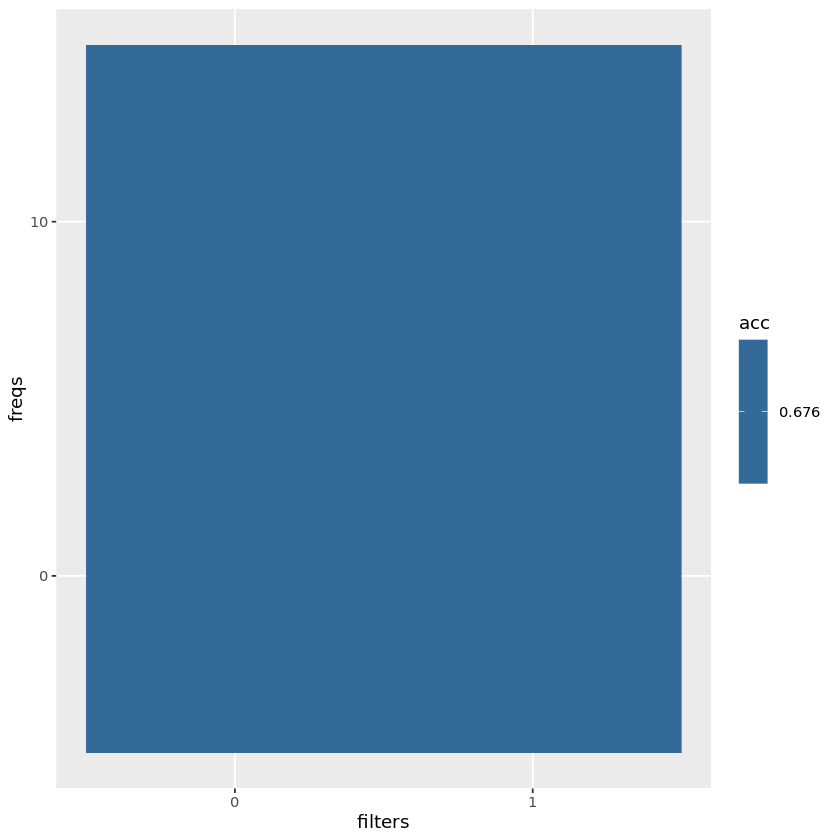

In [204]:
ggplot(df_plt, aes(x=filters, y=freqs)) +
geom_raster(aes(fill=acc))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=811d2f44-4ec2-4c23-800a-72ed1acf812e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>